# Lecture 21 - Linear Regression Part 2

Today we'll work through more properties and ideas surrounding linear regression. As with previous lectures, we will explore concepts mainly in this notebook, but you can also refer to the slides for a more concise presentation.

In [1]:
## Import packages

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

# Set size of font for matplotplib
plt.rc('font', size=12) 

print("Done importing packages :)")

Done importing packages :)


In [2]:
def lin_reg_t_test(x,y,df):

    regr = linear_model.LinearRegression()
    regr.fit(x.reshape(-1,1), y.reshape(-1,1))


    a = regr.intercept_
    b = regr.coef_[0][0]

    print(a,b)

    y_hats = a + b*x

    MS_residual_num = np.sum((y - y_hats)**2)

    df = np.size(x) -2
    MS_residual_den = df
    MS_resid = MS_residual_num/MS_residual_den

    print(f"MS_resid={MS_resid}")

    SS_X = np.sum((x-x.mean())**2)
    SE_b = np.sqrt(MS_resid/SS_X)

    print(f"SE_b = {SE_b}")

    B_0 = 0
    t = (b-B_0)/SE_b

    print(f"t={t}")


    pval = stats.t.sf(np.abs(t), df)*2
    print(f"two-sided p-value={pval}")
    
    return pval

def standard_error_b(x,y,df):
    
    regr = linear_model.LinearRegression()
    regr.fit(x.reshape(-1,1), y.reshape(-1,1))


    a = regr.intercept_
    b = regr.coef_[0][0]

    print(a,b)

    y_hats = a + b*x

    MS_residual_num = np.sum((y - y_hats)**2)

    df = np.size(x) -2
    MS_residual_den = df
    MS_resid = MS_residual_num/MS_residual_den

    print(f"MS_resid={MS_resid}")

    SS_X = np.sum((x-x.mean())**2)
    SE_b = np.sqrt(MS_resid/SS_X)
    
    return SE_b


    

print("Done defining functions :)")

Done defining functions :)


--------
## RNA and Protein relationship (slide 10)
The central dogma tells us that DNA is transcribed to RNA which is translated into a protein. Proteins are difficult to observe in the cell, but RNA is quite 'easy'. So often we record the amount of RNA for gene X and assume that we can use the RNA count to estimate the protein count. Is this a good assumption?

If yes, we should see a highly correlated, very linear relationship between the RNA and protein counts.

Below we'll investigate using 30 randomly sampled genes from the data in [Schwanhäusser et al., 2011](https://www-nature-com.proxy.library.upenn.edu/articles/nature10098)

In [3]:
# RNA molecules/cell in the first column, matched protein molecules/cell in the second column.
rna_protein=np.array([[4.81300000e+01, 7.59187000e+04],
       [1.04500000e+01, 4.71734900e+04],
       [5.91000000e+00, 2.81650200e+04],
       [3.31000000e+00, 8.01429000e+03],
       [3.08400000e+01, 5.10501640e+05],
       [2.29600000e+01, 8.32250900e+04],
       [3.63000000e+00, 9.47810000e+02],
       [1.55800000e+01, 2.89878500e+04],
       [8.50000000e+00, 2.68726130e+05],
       [2.00000000e+01, 3.03753130e+05],
       [2.48000000e+00, 2.36163800e+04],
       [3.21800000e+01, 1.41199720e+05],
       [2.38030000e+02, 2.67488198e+06],
       [8.90700000e+01, 1.97755860e+05],
       [1.76700000e+01, 3.08072700e+04],
       [1.19570000e+02, 1.35270000e+02],
       [4.39000000e+00, 3.76832000e+03],
       [1.13300000e+01, 1.42453100e+04],
       [9.88000000e+00, 1.54796000e+03],
       [7.49100000e+01, 1.15433729e+06],
       [1.01600000e+01, 2.21075600e+05],
       [1.43800000e+01, 2.77751000e+03],
       [7.60000000e+00, 6.36265000e+03],
       [1.15100000e+01, 1.40526600e+04],
       [9.83000000e+00, 6.19777800e+04],
       [1.35600000e+01, 1.12027940e+05],
       [6.29100000e+01, 1.37365337e+06],
       [1.59000000e+01, 7.66850000e+03],
       [2.58800000e+01, 4.67021540e+05],
       [3.47200000e+01, 2.30052900e+05]])

# Separating into just rna and protein to make flow simpler
rna = rna_protein[:, 0]
protein = rna_protein[:, 1]


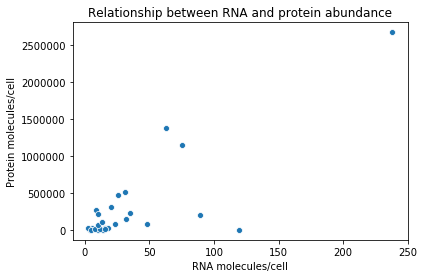

In [4]:
# What does our data look like? (slide 12)

sns.scatterplot(rna,protein)
plt.xlabel("RNA molecules/cell")
plt.ylabel("Protein molecules/cell")
plt.title("Relationship between RNA and protein abundance");

Let's try fitting a line to these data...

In [5]:
# Calculate the slope and intercept protein = a + b*rna (slide 13)
rna_mean = np.mean(rna)
protein_mean = np.mean(protein)

b = (np.sum((rna - rna_mean)*(protein - protein_mean)))/(np.sum((rna - rna_mean)**2))
a = protein_mean - b*rna_mean

print(a,b)

-38347.55939951743 9479.227026347087


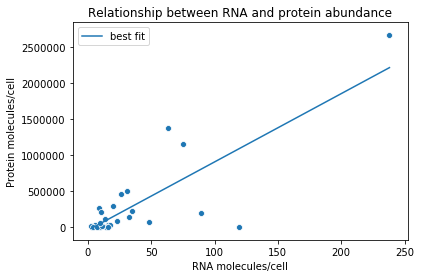

In [6]:
# Plot the line of best fit (slide 14)

sns.lineplot(rna, a+ (b*rna), label="best fit")
sns.scatterplot(rna, protein)
plt.xlabel("RNA molecules/cell")
plt.ylabel("Protein molecules/cell")
plt.title("Relationship between RNA and protein abundance");

### Did we do a good job? (slide 15)

A **residual plot** is a scatter plot of the residuals $(Y_i - \hat{Y}_i)$ against the values of the explanatory variable (rna for our case).

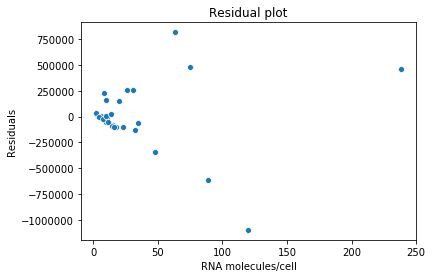

In [7]:
# First calculate the Y hats (the values of protein predicted by our best-fitting line)
protein_hats = a + b*rna

# Calculate the residuals
residuals = protein - protein_hats

# Plot the residual plot
sns.scatterplot(rna, residuals)
plt.xlabel("RNA molecules/cell")
plt.ylabel("Residuals")
plt.title("Residual plot");

This is bad. The fit gets worse and worse as we have more RNA molecules/cell. Definitely we should not assume that the variance of Y-values at each value of X is the same.

What do we do instead?


______
## Data tranformations (slide 17)

Just like before, we can try transforming the data to make it fit our assumptions.
What transformation should we try here?

7.971840726818917 0.9562561334346725


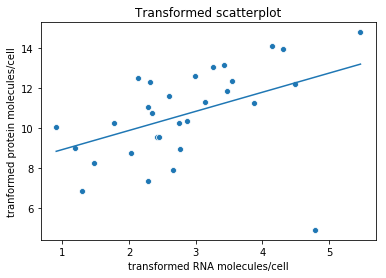

In [8]:
# transformed_protein = ??
# transformed_rna = ??

transformed_protein = np.log(protein)
transformed_rna = np.log(rna)

# Check our transformation using a scatterplot and show regression line

b_transformed = (np.sum((transformed_rna - transformed_rna.mean())*(transformed_protein - transformed_protein.mean())))/(np.sum((transformed_rna - transformed_rna.mean())**2))
a_transformed = transformed_protein.mean() - b_transformed*transformed_rna.mean()


# Plot!
sns.scatterplot(transformed_rna, transformed_protein)
sns.lineplot(transformed_rna, a_transformed + b_transformed*transformed_rna)
# Change labels!
plt.xlabel("transformed RNA molecules/cell")
plt.ylabel("tranformed protein molecules/cell")
plt.title("Transformed scatterplot");

print(a_transformed,b_transformed)

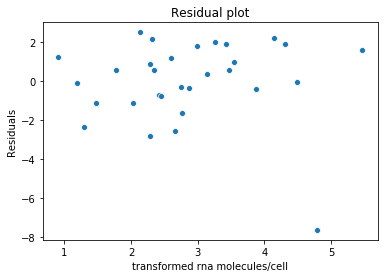

In [9]:
# Check residual plot (slide 18)

transformed_protein_hats = a_transformed + b_transformed*transformed_rna
transformed_residuals = transformed_protein - transformed_protein_hats

sns.scatterplot(transformed_rna, transformed_residuals)
plt.xlabel("transformed rna molecules/cell")
plt.ylabel("Residuals")
plt.title("Residual plot");

Fitting assumptions is not the only way transformations help us. Let's say we had a relationship that was not so linear looing...

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


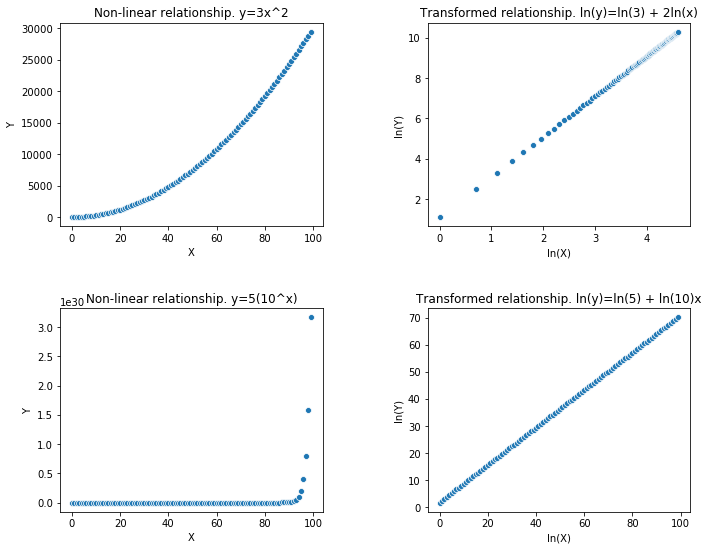

In [10]:
# Generate random data
x_values = np.arange(100)
y1_values = 3*(x_values)**2
y2_values = 5*np.float_power(2, x_values)

plt.figure(figsize=(10,9))

plt.subplot(2, 2, 1)
sns.scatterplot(x_values, y1_values)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-linear relationship. y=3x^2")

plt.subplot(2,2,2)
sns.scatterplot(np.log(x_values), np.log(y1_values))
plt.xlabel("ln(X)")
plt.ylabel("ln(Y)")
plt.title("Transformed relationship. ln(y)=ln(3) + 2ln(x)")

plt.subplot(2,2,3)
sns.scatterplot(x_values, y2_values)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-linear relationship. y=5(10^x)")

plt.subplot(2,2,4)
sns.scatterplot(x_values, np.log(y2_values))
plt.xlabel("ln(X)")
plt.ylabel("ln(Y)")
plt.title("Transformed relationship. ln(y)=ln(5) + ln(10)x")

# Adjust spacing between the subplots
plt.subplots_adjust(bottom=None, right=1, top=None, wspace=0.4, hspace = 0.4)

------
## Extrapolating (slide 20)

So now we have a decent linear relation. Does that mean that when we measure the RNA abundance of a new gene, that we can immediately know it's protein level?


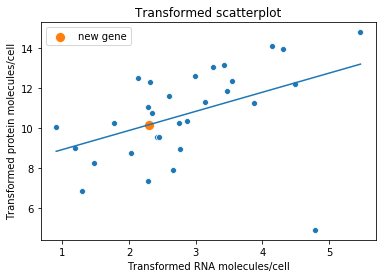

In [11]:
new_gene_rna = 10

# Plot the new data point where we expect it to fall on our scatter
transformed_new_gene = np.log(new_gene_rna)

# Plot!

sns.scatterplot(transformed_rna, transformed_protein)
sns.lineplot(transformed_rna, a_transformed + b_transformed*transformed_rna)
sns.scatterplot([transformed_new_gene], [a_transformed + b_transformed*transformed_new_gene], s=100, label = "new gene")

plt.xlabel("Transformed RNA molecules/cell")
plt.ylabel("Transformed protein molecules/cell")
plt.title("Transformed scatterplot");

But what if we saw 0 RNA molecules? What does our model say about the protein levels?

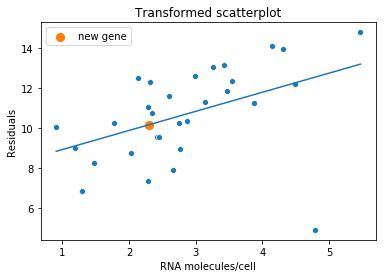

In [12]:
## Change the value of new_gene_rna (slides 21 and 22)

new_gene_rna = 10

# Plot the new data point where we expect it to fall on our scatter
transformed_new_gene = np.log(new_gene_rna)

# Plot!
sns.scatterplot(transformed_rna, transformed_protein)
sns.lineplot(transformed_rna, a_transformed + b_transformed*transformed_rna)
sns.scatterplot([transformed_new_gene], [a_transformed + b_transformed*transformed_new_gene], s=100, label = "new gene")

plt.xlabel("RNA molecules/cell")
plt.ylabel("Residuals")
plt.title("Transformed scatterplot");

So if we see 0 expression, we still expect non-zero protein levels!

**Warning** Extrapolating beyond the range of values we used to perform the regression can lead to impossible and unlikely results -- **Don't do it!**

------
## Effects of error (slide 23)

Let's give the researchers a break -- there was probably just a lot of measurement error in the observations. Maybe the relationship is real but the act of measuring these quantities has some inherant noise. 

While we may not be able to answer that question, what *would* error do to a real linear relationship?

[3.] -4.000000000000001
MS_resid=8.865267150480172e-28
SE_b = 1.0314739220662882e-16
t=-3.87794583501156e+16
two-sided p-value=0.0
[-19.0120051] -3.5516786416707506
MS_resid=1532.603021233143
SE_b = 0.12783660541796252
t=-27.782954890412782
two-sided p-value=2.930122646298427e-48
[3.73591574] -4.007658718387229
MS_resid=115.86164204348589
SE_b = 0.0372891237815676
t=-107.47527192817161
two-sided p-value=1.6946162735011601e-103
[-18.26421561] -3.559569159738504
MS_resid=1646.9131370482683
SE_b = 0.1325182640375135
t=-26.860970339385485
two-sided p-value=5.472192089107523e-47


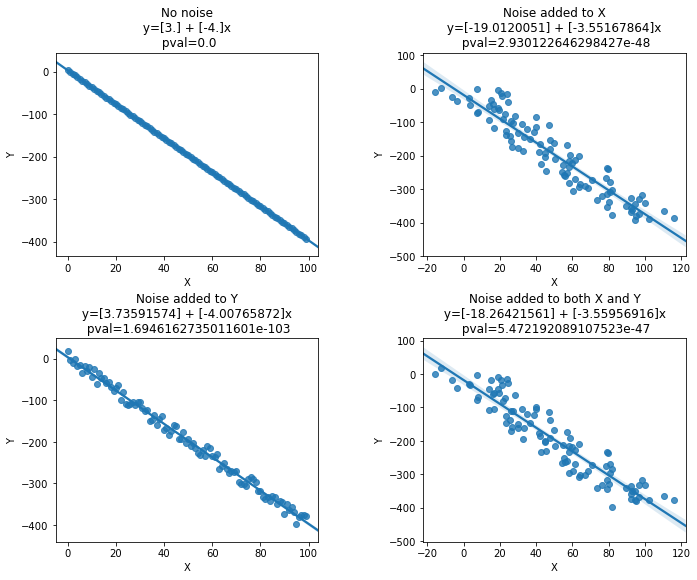

In [13]:
# Use the same x_values as before
y_values = 3 - 4*x_values

# To make things quicker, use sklearn to calculate linear regression values
from sklearn import linear_model

regr = linear_model.LinearRegression()


plt.figure(figsize=(10,9))

# Plot the original data
plt.subplot(2, 2, 1)

regr.fit(x_values.reshape(-1,1), y_values.reshape(-1,1))

sns.regplot(x_values, y_values)
pval = lin_reg_t_test(x_values,y_values, np.size(x_values)-2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f'No noise\n y={regr.intercept_} + {regr.coef_[0]}x \n pval={pval}')

# Add noise JUST to x values
# Adjust the low, high values to adjust the noise range
x_values_noise = x_values + np.random.uniform(low=-20,high=20, size=x_values.size)


regr.fit(x_values_noise.reshape(-1,1), y_values.reshape(-1,1))

plt.subplot(2,2,2)
sns.regplot(x_values_noise, y_values)
pval = lin_reg_t_test(x_values_noise,y_values, np.size(x_values)-2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Noise added to X\n y={regr.intercept_} + {regr.coef_[0]}x \n pval={pval}")



# Add noise to JUST the y values
y_values_noise = y_values + np.random.uniform(low=-20, high=20, size = y_values.size)

regr.fit(x_values.reshape(-1,1), y_values_noise.reshape(-1,1))

plt.subplot(2,2,3)
sns.regplot(x_values, y_values_noise)
pval = lin_reg_t_test(x_values,y_values_noise, np.size(x_values)-2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Noise added to Y\n y={regr.intercept_} + {regr.coef_[0]}x \n pval={pval}")


# Add noise to both

regr.fit(x_values_noise.reshape(-1,1), y_values_noise.reshape(-1,1))

plt.subplot(2,2,4)
sns.regplot(x_values_noise, y_values_noise, fit_reg=True)
pval = lin_reg_t_test(x_values_noise,y_values_noise, np.size(x_values)-2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Noise added to both X and Y\n y={regr.intercept_} + {regr.coef_[0]}x \n pval={pval}")

# Adjust spacing between the subplots
plt.subplots_adjust(bottom=None, right=1, top=None, wspace=0.4, hspace = 0.4)

______

## Data 2: Height vs standing long jumps (slide 24)

Thanks to your responses, we will take a break from protein and RNA levels for a bit and turn to the standing long jump data we collected.

In [14]:
## Data

heights = np.array([69. , 63. , 71. , 66. , 71. , 61. , 67. , 65. , 64. , 66. , 74. ,
       68. , 67. , 68. , 67. , 73. , 62. , 75. , 68. , 66. , 64. , 67. ,
       69. , 67. , 69. , 75. , 67. , 60. , 72. , 63. , 75.5, 68. , 66. ,
       61. ])
jump1 = np.array([ 50.2,  72. ,  84. ,  80. ,  56.5,  43. ,  78. ,  75. ,  39. ,
        35. ,  87. ,  72. ,  92. ,  97. ,  72.5, 100. ,  51.5,  85. ,
        63. ,  62. ,  51. ,  33. ,  89. ,  79. ,  75.5,  80. ,  86. ,
        66. ,  86. ,  58. , 102. ,  63. ,  44. ,  43. ])
jump2 = np.array([ 57.4,  72.5,  78. ,  81. ,  60.5,  45. ,  75. ,  74. ,  40. ,
        34. ,  90. ,  75. ,  94. , 101. ,  69. , 105. ,  46. ,  91. ,
        70. ,  60.5,  53. ,  35. ,  87. ,  78. ,  82. ,  83. ,  88. ,
        75. ,  89. ,  59. , 103. ,  65. ,  62. ,  48. ])
avg_jump = np.mean([jump1, jump2], axis=0)
avg_jump

array([ 53.8 ,  72.25,  81.  ,  80.5 ,  58.5 ,  44.  ,  76.5 ,  74.5 ,
        39.5 ,  34.5 ,  88.5 ,  73.5 ,  93.  ,  99.  ,  70.75, 102.5 ,
        48.75,  88.  ,  66.5 ,  61.25,  52.  ,  34.  ,  88.  ,  78.5 ,
        78.75,  81.5 ,  87.  ,  70.5 ,  87.5 ,  58.5 , 102.5 ,  64.  ,
        53.  ,  45.5 ])

Do you expect a linear relationship between height and average distance jumped?

Text(0.5, 1.0, 'Relation between height and jump distance\n y=[-123.6611798] + [2.87318811]x')

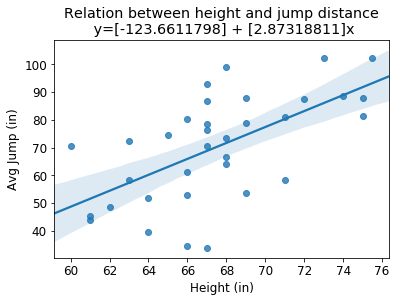

In [32]:
# Draw a scatterplot with the line of best fit (slide 26)

regr = linear_model.LinearRegression()
regr.fit(heights.reshape(-1,1), avg_jump.reshape(-1,1))

sns.regplot(heights,avg_jump)
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)")
plt.title(f"Relation between height and jump distance\n y={regr.intercept_} + {regr.coef_[0]}x")


_____

## The effect of outliers (slide 27)

Let's say now we also included Byron Jones' jump of 146.75 inches. Byron is 73 inches tall. How does that change our regression line?

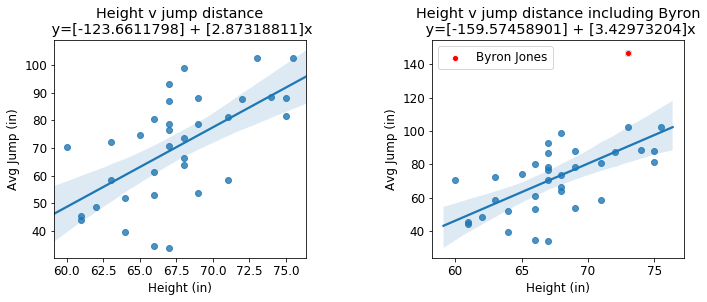

In [33]:
heights_byron = np.append(heights,73)
avg_jump_byron = np.append(avg_jump,146.73)


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.regplot(heights,avg_jump)
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)")
plt.title(f"Height v jump distance\n y={regr.intercept_} + {regr.coef_[0]}x")



# Redo line of best fit
regr = linear_model.LinearRegression()
regr.fit(heights_byron.reshape(-1,1), avg_jump_byron.reshape(-1,1))

plt.subplot(1,2,2)

sns.regplot(heights_byron,avg_jump_byron)
sns.scatterplot([73], [146.73], color ="red", label = "Byron Jones")
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)")
plt.title(f"Height v jump distance including Byron\n y={regr.intercept_} + {regr.coef_[0]}x")


plt.subplots_adjust(bottom=None, right=1, top=None, wspace=0.5, hspace = 0.4)

**Outliers** can greatly alter the estimates and even direction of your regression line. If you have outliers, first examine why they might be an outlier (is there some underlying biology that greatly changes their behavior?), and *consider* removing. Perhaps the most ethical option is to show the fit with the outlier, and then show the fit after removing the outlier.

--------

## Confidence bands and confidence in predictions

What is that blue shaded area around the regression line plotted by regplot that we have expertly ignored until now? This is the 95% confidence band. 

The **confidence band** measures the precision of the predicted mean Y for each value of X. (slide 28)

Text(0.5, 1.0, 'Confidence bands')

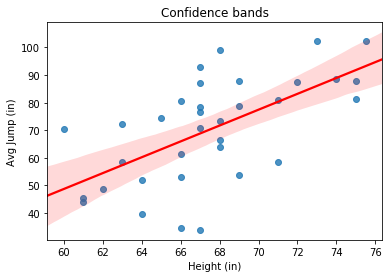

In [17]:
## The confidence band is shown in red in the following plot

sns.regplot(heights, avg_jump, line_kws={"color": "red", "label": "fit"})
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)")
plt.title("Confidence bands")

Is this the same as predicting an individual new y-value? 

Let's say I make a standing long jump. How confident can you be in the prediction of *my jump distance*? (slide 29)

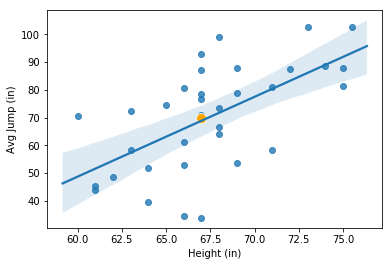

In [18]:
drB_height = 67
drB_jump = 70

sns.regplot(heights, avg_jump)
sns.scatterplot([drB_height], [drB_jump], color = "orange", s=100)
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)");

The confidence band only describes precision in predicting the *mean* Y value for the given X value. Individuals have variation, so in order to capture the precision in estimating a new individual data point, we need the prediction intervals.

The **prediction interval** meaures the precision of the predicted single Y-values for each X. (slide 30)


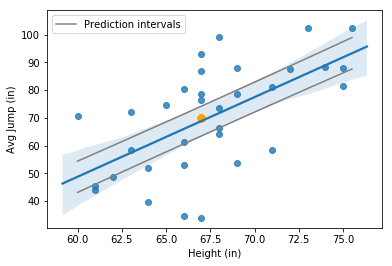

In [19]:
## Calculate and plot the prediction intervals

regr.fit(heights.reshape(-1,1), avg_jump.reshape(-1,1))
a_height = regr.intercept_
b_height = regr.coef_[0]

avg_jump_hats = a_height + b_height*heights
MS_resid_jump = (np.sum((avg_jump - avg_jump_hats)**2))/(heights.shape[0] -2)
SE_predict_heights = np.sqrt(MS_resid_jump * ((1/heights.shape[0])*(1+((heights-np.mean(heights))**2)/(np.sum((heights-np.mean(heights))**2)))))
t = stats.t.ppf(0.975, heights.shape[0]-2)

sns.regplot(heights,avg_jump)
sns.lineplot(heights, avg_jump_hats - t*SE_predict_heights, color = "gray")
sns.lineplot(heights, avg_jump_hats + t*SE_predict_heights, color="gray", label="Prediction intervals")
sns.scatterplot([drB_height], [drB_jump], color = "orange", s=100)
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)");

We can also calculate a more standard confidence interval for the slope. The 1-$\alpha$% confidence interval for the slope is:

$$ b - t_{\alpha(2),df}SE_b < \beta <  b + t_{\alpha(2),df}SE_b$$


In [20]:
## Calculate the confidence interval for the slope

df_height = np.size(avg_jump)-2
alpha = 0.05
t_adf = stats.t.ppf(1-(alpha/2), df_height)

SE_b_height = standard_error_b(heights,avg_jump, df_height)
confidence_lower = b_height - t_adf*SE_b_height
confidence_upper = b_height + t_adf*SE_b_height

print(f"The 95% confidence interval is [{confidence_lower}, {confidence_upper}]")


[-123.6611798] 2.8731881077782346
MS_resid=236.33459861346958
The 95% confidence interval is [[1.5430691], [4.20330712]]


_____

## Regression towards the mean (Slide 31)

This concept is a little tricky, so we will demonstrate with our collected standing jump data. 

The overall idea is that if you measure something on an individual and then measure that something again at a later date, the natural variability in the individual will lessen the regression slope. From your book 

> Regression toward the mean results when two variables measured on a sample of individuals have a correlation less than one. Individuals that are far from the mean for one of the measurements will, on average, lie closer to the mean for the other measurements.

Let's see if we observe this phenomenon with our jumping data.

The mean of jump 1 results = 69.12352941176471 in 
 and the mean of jump 2 results = 71.35000000000001 in


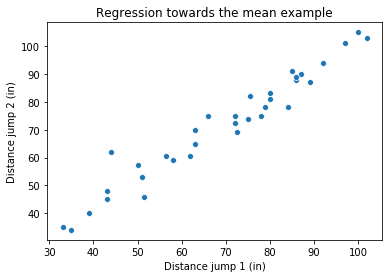

In [23]:
# Scatter the first jump results against the second jump

print(f"The mean of jump 1 results = {np.mean(jump1)} in \n and the mean of jump 2 results = {np.mean(jump2)} in")
sns.scatterplot(jump1, jump2)
plt.xlabel("Distance jump 1 (in)")
plt.ylabel("Distance jump 2 (in)")
plt.title("Regression towards the mean example");

Regression towards the mean can be a real problem for medical studies. For example, if we looked at the response of sick individuals to a treatment, people will appear to get better even though the treatment may have had no effect, just because the individuals well-being is tending back towards the average. Having a control group in your study prevents this misinterpretation.

------

## Data 3: Aspartate transcarbamoylase (ATCase) activity (slide 32)

Our final dataset comes from my previous work in studying ATCase kinetics. [ATCase](http://biology.kenyon.edu/BMB/jmol2014/ATCaseASKC/indexATCase.html) catalyzes a crucial step in the pyrimidine synthesis pathway:

<br/>
<div align="center">L-aspartate (Asp) + carbamoyl phosphate (CP) --> carbamoyl aspartate (CA) </div>
<br/>

In the assay, we add increasing levels of Asp, while keeping CP levels constant. Then using fluorescence we measure the amount of CA formed within a short time window, which we can use to directly calculate the enzyme activity called *specific activity*. The more CA produced within the time window, the higher the specific activity. In other words, the steeper the slope, the more active the enzyme*. 

In [24]:
## Data for ATCase assay. Arrays report the concentration in mM

Asp = np.array([0, 1, 2, 3, 5, 7, 10, 20, 30, 40, 60])
#sa_ph8 = np.array([0, 5.55004, 11.01986, 15.22968, 22.69824, 27.44544, 31.75422, 34.76012, 32.25596, 29.78312, 26.23714])
#sa_ctputpmg = np.array([0, 0.6814, 1.2617, 2.07858, 4.05992, 6.1683, 10.44972, 23.56204, 28.99312, 29.62764, 27.60816])
sa_ph7 = np.array([0, 1.93642, 3.616, 4.8907, 6.67802, 7.86218, 8.87624, 11.0553, 11.843325, 12.42858, 13.45055])


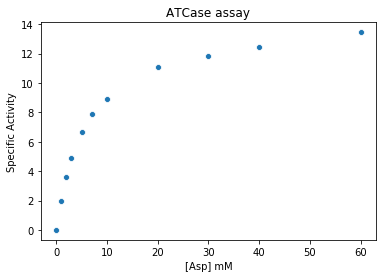

In [41]:
# Make a scatter plot of the data

sns.scatterplot(Asp, sa_ph7)
plt.xlabel("[Asp] mM")
plt.ylabel("Specific Activity")
plt.title("ATCase assay");

What is the relationship between the aspartate concentration and the specific activity of the enzyme?

How should we proceed?

# In-class exercises

For your exercise today you will perform three hypothesis tests: one on the jump/height data, one on the RNA/protein data, and one on the ATCase data.

1. For the height/jump data, test the hypothesis that the slope is 0.

2. For the RNA/protein data, what do you think the slope should be? Test the hypothesis that the slope is that value.

3. For the ATCase data, apply a transform to make the data more linear. What do you think the relationship should be for this transformed data? Test the hypothesis that the slope of the transformed data is that value.

**For each of the above, report the following on canvas:**
1. State the null and alternative hypothesis.
2. State what you think the slope should be and why (if applicable).
3. Explain how your result affects how you think about the biology of the system. For example, if you find the slope of the line of best fit for the rna/protein data is 0.6, how should we proceed with interpreting later biological results that only have RNA counts?

*We will discuss this statement more next class